##Assignment 
Add a new notebook in which you are loading the same dataset for the drive, create plots of the data (for consumption, temperature, and irradiance) and save it to a figure on Drive (keep using your name in all of the files you generate if you are using the shared folder). and also save the final Dataframe that you have generated to a modified_csv_yourname.csv fil


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
MyData_Path ="/content/drive/MyDrive/EETBS 2021-2022/Data" 
Consumption_Name = "consumption_5545.csv"
Temperature_Name = "Austin_weather_2014.csv"
Irradiance_Name = "irradiance_2014_gen.csv"

In [6]:
Consumption_Path = os.path.join(MyData_Path,Consumption_Name)
Temperature_Path = os.path.join(MyData_Path,Temperature_Name)
Irradiance_Path = os.path.join(MyData_Path,Irradiance_Name)

In [8]:
Consumption_Path #Just Checking

'/content/drive/MyDrive/EETBS 2021-2022/Data/consumption_5545.csv'

In [10]:
DF_Consumption = pd.read_csv(Consumption_Path,sep = ",",index_col =0, parse_dates=[0])
DF_Temperature_1 = pd.read_csv(Temperature_Path,sep=";",index_col = ["localhour"],parse_dates=["localhour"],date_parser=lambda col:pd.to_datetime(col,utc=True).tz_convert("US/Central").tz_localize(None))
DF_Temperature = DF_Temperature_1[["temperature"]]
DF_Irradiance_1 =  pd.read_csv(Irradiance_Path,sep = ";",index_col =["localhour"], parse_dates=["localhour"])
DF_Irradiance = DF_Irradiance_1[["gen"]]


In [11]:
DF_Consumption

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0
2014-01-01 09:00:00,0.0
2014-01-01 10:00:00,0.0
...,...
2014-12-31 01:00:00,NaN
2014-12-31 02:00:00,NaN
2014-12-31 03:00:00,NaN
2014-12-31 04:00:00,NaN


In [12]:
DF_Irradiance

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350
2014-01-01 03:00:00,-0.006267
2014-01-01 04:00:00,-0.006767
...,...
2015-01-01 19:00:00,-0.005450
2015-01-01 20:00:00,-0.005600
2015-01-01 21:00:00,-0.005783


In [13]:
DF_Temperature

,temperature
localhour,
2014-01-01 00:00:00,40.36
2014-01-01 01:00:00,38.11
2014-01-01 02:00:00,38.65
2014-01-01 03:00:00,38.47
2014-01-01 04:00:00,38.00
...,...
2015-01-01 19:00:00,38.14
2015-01-01 20:00:00,38.18
2015-01-01 21:00:00,38.25


In [14]:
DF_Irradiance.loc[DF_Irradiance["gen"]<0,"gen"] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
DF_Irradiance

,gen
localhour,
2014-01-01 00:00:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 02:00:00,0.0
2014-01-01 03:00:00,0.0
2014-01-01 04:00:00,0.0
...,...
2015-01-01 19:00:00,0.0
2015-01-01 20:00:00,0.0
2015-01-01 21:00:00,0.0


In [16]:
DF_Complete_Data = DF_Consumption.join([DF_Irradiance,DF_Temperature])

In [17]:
DF_Complete_Data

,air conditioner_5545,gen,temperature
2014-01-01 06:00:00,0.0,0.000000,39.36
2014-01-01 07:00:00,0.0,0.052800,37.86
2014-01-01 08:00:00,0.0,0.773583,38.97
2014-01-01 09:00:00,0.0,2.097700,45.85
2014-01-01 10:00:00,0.0,3.036750,51.42
...,...,...,...
2014-12-31 01:00:00,NaN,0.000000,38.96
2014-12-31 02:00:00,NaN,0.000000,38.81
2014-12-31 03:00:00,NaN,0.000000,39.33
2014-12-31 04:00:00,NaN,0.000000,39.54


In [22]:
ProcessFolder_path = "/content/drive/MyDrive/EETBS 2021-2022/Processed Data"
DF_Complete_Data_Name = "Modified_csv_Syed Ali Raza_(10758930).csv"
DF_Complete_Data_Path = os.path.join(ProcessFolder_path,DF_Complete_Data_Name)
DF_Complete_Data.to_csv(DF_Complete_Data_Path)

In [19]:
DF_Complete_Data= DF_Complete_Data.rename(columns={"air conditioner_5545":"consumption","gen":"Irradiance"})
DF_Complete_Data.dropna(inplace=True)

In [20]:
DF_Complete_Data

,consumption,Irradiance,temperature
2014-01-01 06:00:00,0.0,0.000000,39.36
2014-01-01 07:00:00,0.0,0.052800,37.86
2014-01-01 08:00:00,0.0,0.773583,38.97
2014-01-01 09:00:00,0.0,2.097700,45.85
2014-01-01 10:00:00,0.0,3.036750,51.42
...,...,...,...
2014-12-30 20:00:00,0.0,0.000000,41.52
2014-12-30 21:00:00,0.0,0.000000,40.37
2014-12-30 22:00:00,0.0,0.000000,40.15
2014-12-30 23:00:00,0.0,0.000000,40.00


In [23]:
ProcessFolder_path = "/content/drive/MyDrive/EETBS 2021-2022/Processed Data"
DF_Complete_Data_Name = "Modified_csv_Syed Ali Raza_(10758930).csv"
DF_Complete_Data_Path = os.path.join(ProcessFolder_path,DF_Complete_Data_Name)
DF_Complete_Data.to_csv(DF_Complete_Data_Path)

In [29]:
DF_Complete_Data_selected= DF_Complete_Data.loc['2014-6-1 00:00:00':'2014-6-1 23:00:00']

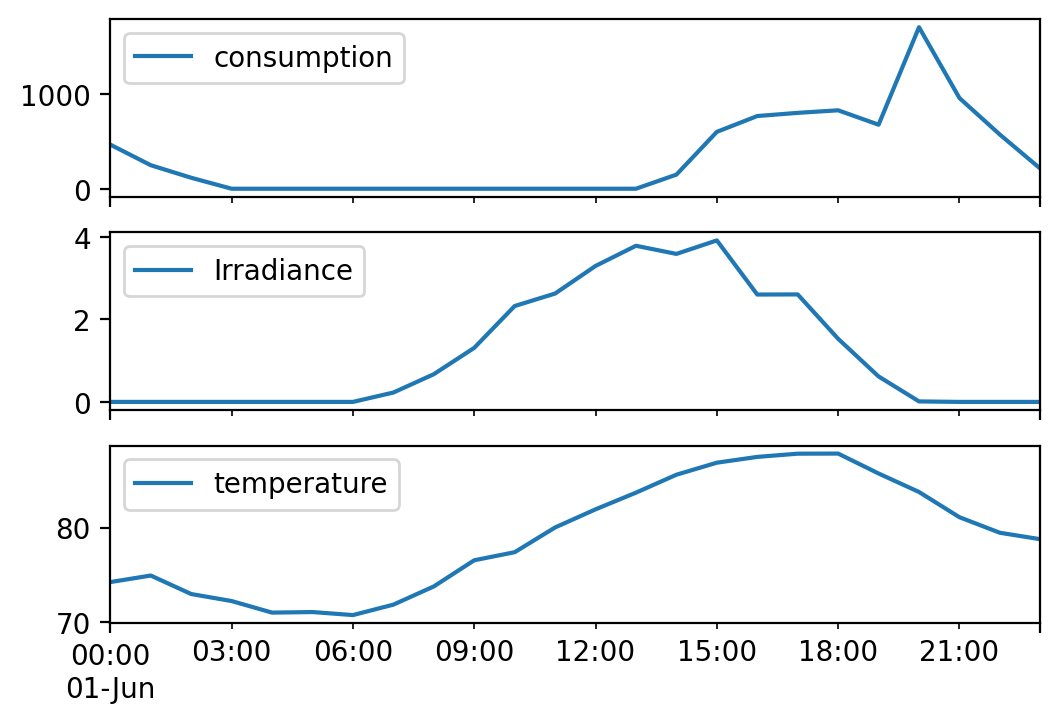

In [38]:
fig, axs=plt.subplots(3,1,dpi=200,sharex=True)
DF_Complete_Data_selected[["consumption"]].plot(ax=axs[0])
axs[0].legend(["consumption"])
DF_Complete_Data_selected[["Irradiance"]].plot(ax=axs[1])
axs[1].legend(["Irradiance"])
DF_Complete_Data_selected[["temperature"]].plot(ax=axs[2])
axs[2].legend(["temperature"])
figName="10758930_consumption vs Irrad VS Temperature_Syed Ali Raza .jpg"
figuresFolderPath = "/content/drive/MyDrive/EETBS 2021-2022/Processed Data/Figures"
fig_filepath = os.path.join(figuresFolderPath, figName)
plt.savefig(fig_filepath)
